In [1]:
#import libraries
import pandas as pd
import time
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt




## Load data

In [3]:
# df1 = pd.read_csv("../data/kmerdata.csv", index_col="sample_id")
df = pd.read_csv("../data/kmerdata1.csv", index_col="sample_id")


In [4]:
df.head()

,AAAAAAAAAAAAAAAAAAAAAAAAAAA,GGGATTACAGGCACCTGCCACCACACC,GCCTGGCTAATTTTTATATTTTTAGTA,GGCTGGGCACGGTGGCTCACGCCTGTA,AGGCAGGAGAATGGCATGAACCCGGGA,GCTTCTGCACAGCAAAAGAAACTATCA,ACGCCATTGCACTCCAGCCTGGGCAAC,TCTTGGGAGGGTGTATGTGTCGAGGAA,AGTCTTGCTCTGTCTCCCAGGCTGGAG,CCAAAAAAGAGCCCGCATTGCCAAGTC,...,GGATCGCTTGAGCCCAGGAGTTTGAGA,AAAAAAAAAAAAAAAAGAAAAAAAAAA,GCAGTGAGCTATGATTGCACCACTGCA,ATTCTCCTGCCTCAGCCTCCCGAGTAC,GAAGGAAGGGAGGGAGGGAGGGAGGGA,AACTTAAAGTATAATAATAAAAAAAAA,GGAGTGCAGTGGCACAATCATGGCTCA,CTCCTAATGCTATCCCTCCCCTAGCCC,CGTCTCAAAAAAAAAAAAAAAAAGAAA,ATTGTTCAATTCCCATCTATGAGTGAG
sample_id,,,,,,,,,,,,,,,,,,,,,
NA19720,184202,1362,1376,3065,5756,3408,3288,1143,1514,1394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA19719,184095,1371,1388,3083,5722,3408,3282,1147,1502,1401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA19678,184783,1387,1386,3053,5746,3397,3275,1148,1499,1397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA19676,183970,1389,1390,3065,5722,3402,3279,1143,1507,1395,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA19468,182214,1462,1387,3084,5750,3413,3287,1146,1514,1397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# df_clean = df.drop(["HG02061","NA19704"],axis=0)
df.code.value_counts() 

MXL    4
LWK    4
GBR    4
Name: code, dtype: int64

In [7]:
# fill NaNs in the data frame with 0
df.fillna(0,inplace=True)

In [10]:
# df2.fillna(0,inplace=True)
# df1.fillna(0,inplace=True)


In [4]:
# print(df1.code.unique())
# print(df2.code.unique())

['MXL' 'ASW' 'LWK' 'STU' 'KHV']
['MXL' 'LWK' 'GBR']


In [44]:
df1.code.unique()
c={'MXL':0, 'ASW':1, 'LWK':2, 'STU':3, 'KHV':4}
df1["code"]=df1["code"].replace(c)
df1.code.unique()

array([0, 1, 3, 4])

In [11]:
country={"MXL":0,"LWK":1,"GBR":2,"STU":3}
df2["code"]=df2["code"].replace(country)
df2["code"]

sample_id
NA19720    0
NA19719    0
NA19678    0
NA19676    0
NA19468    1
NA19456    1
NA19454    1
NA19440    1
HG00238    2
HG00236    2
HG00235    2
HG00234    2
Name: code, dtype: int64

In [4]:
country={"MXL":0,"LWK":1,"GBR":2,"STU":3}
df2["Population"]=df2["code"].replace(country)
df2["Population"]

sample_id
NA19720    0
NA19719    0
NA19678    0
NA19676    0
NA19468    1
NA19456    1
NA19454    1
NA19440    1
HG00238    2
HG00236    2
HG00235    2
HG00234    2
Name: Population, dtype: int64

In [5]:
#drop Code
df2.drop("code",axis=1, inplace=True)

## Explore

<AxesSubplot:>

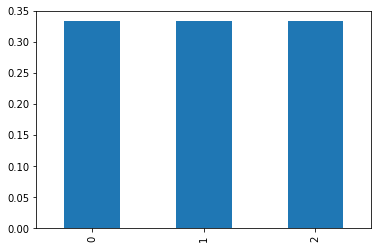

In [12]:
df2["code"].value_counts(normalize=True).plot(kind="bar")


## Split data

In [13]:
target = "code"
X =df2.drop(columns=target)
y = df2[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (12, 32330)
y shape: (12,)


In [46]:
target = "code"
X =df1.drop(columns=target)
y1 = df1[target]

print("X1 shape:", X1.shape)
print("y1 shape:", y1.shape)

X1 shape: (11, 32343)
y1 shape: (11,)


In [112]:
col=X.columns
df3=pd.DataFrame(columns=col)
df3.to_csv("col_names")

In [94]:
X.head()

,AAAAAAAAAAAAAAAAAAAAAAAAAAA,GGGATTACAGGCACCTGCCACCACACC,GCCTGGCTAATTTTTATATTTTTAGTA,GGCTGGGCACGGTGGCTCACGCCTGTA,AGGCAGGAGAATGGCATGAACCCGGGA,GCTTCTGCACAGCAAAAGAAACTATCA,ACGCCATTGCACTCCAGCCTGGGCAAC,TCTTGGGAGGGTGTATGTGTCGAGGAA,AGTCTTGCTCTGTCTCCCAGGCTGGAG,CCAAAAAAGAGCCCGCATTGCCAAGTC,...,GGATCGCTTGAGCCCAGGAGTTTGAGA,AAAAAAAAAAAAAAAAGAAAAAAAAAA,GCAGTGAGCTATGATTGCACCACTGCA,ATTCTCCTGCCTCAGCCTCCCGAGTAC,GAAGGAAGGGAGGGAGGGAGGGAGGGA,AACTTAAAGTATAATAATAAAAAAAAA,GGAGTGCAGTGGCACAATCATGGCTCA,CTCCTAATGCTATCCCTCCCCTAGCCC,CGTCTCAAAAAAAAAAAAAAAAAGAAA,ATTGTTCAATTCCCATCTATGAGTGAG
sample_id,,,,,,,,,,,,,,,,,,,,,
NA19720,184202,1362,1376,3065,5756,3408,3288,1143,1514,1394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NA19719,184095,1371,1388,3083,5722,3408,3282,1147,1502,1401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NA19678,184783,1387,1386,3053,5746,3397,3275,1148,1499,1397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NA19676,183970,1389,1390,3065,5722,3402,3279,1143,1507,1395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NA19468,182214,1462,1387,3084,5750,3413,3287,1146,1514,1397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)

In [47]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [88]:
clf = make_pipeline(
    StandardScaler(),
   RandomForestClassifier(n_estimators=100, random_state=42)
)
print(clf)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [89]:
model =clf.fit(X_train,y_train)

In [90]:
model.predict(X_test)

array(['MXL', 'LWK', 'LWK'], dtype=object)

In [84]:
acc_train = clf.score(X_train,y_train)
acc_test = clf.score(X_test,y# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.6667


<AxesSubplot:>

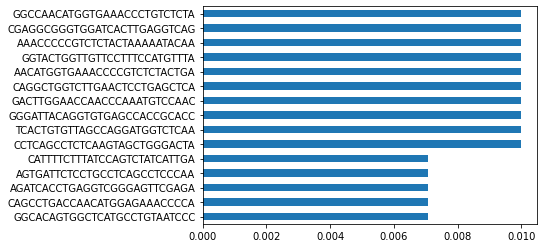

In [91]:
importances1 = model.named_steps["randomforestclassifier"].feature_importances_


# Put importances into a Series
feat_imp1 = pd.Series(importances1,index=X_train.columns).sort_values()

# Plot series
feat_imp1.tail(15).plot(kind="barh")


In [96]:
model.predict_log_proba(X_test)

array([[-1.66073121, -2.20727491, -0.35667494],
       [-0.94160854, -0.51082562, -4.60517019],
       [-0.94160854, -0.56211892, -3.21887582]])

In [ ]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

In [85]:
#

AttributeError: 'Pipeline' object has no attribute 'estimators_'

In [66]:
clf.fit(X1_train,y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [67]:
clf.predict(X1_test)

array([3, 0, 3])

In [68]:
y1_test

sample_id
NA19467    1
NA19719    0
HG03838    3
Name: code, dtype: int64

In [63]:
clf.predict(X_test)

array(['MXL', 'LWK', 'LWK'], dtype=object)

In [69]:
acc_train = clf.score(X1_train,y1_train)
acc_test = clf.score(X1_test,y1_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.6667


<AxesSubplot:>

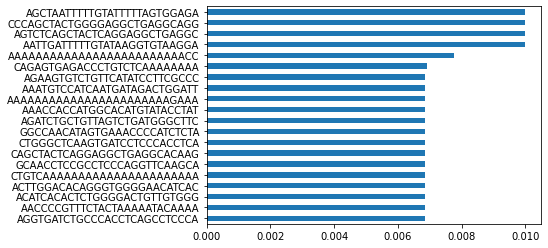

In [75]:
importances = clf.named_steps["randomforestclassifier"].feature_importances_


# Put importances into a Series
feat_imp = pd.Series(importances,index=X1_train.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
  

from sklearn.svm import SVC
  
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
  
prediction = svc_model.predict(X_test)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

1.0
0.6666666666666666


AttributeError: 'SVC' object has no attribute 'coef'

AttributeError: 'Pipeline' object has no attribute 'estimators_'

In [48]:
# Create empty lists for training and validation accuracy scores
training_acc1 = []
validation_acc1 = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model =  make_pipeline(
    StandardScaler(),DecisionTreeClassifier(max_depth=d, random_state=42))
    # Fit model to training data
    test_model.fit(X1_train, y1_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X1_train, y1_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X1_test,y1_test))

print("Training Accuracy Scores:", training_acc1[:3])
print("Validation Accuracy Scores:", validation_acc1[:3])

Training Accuracy Scores: []
Validation Accuracy Scores: []


In [23]:
# Build Model
model = make_pipeline(StandardScaler(),DecisionTreeClassifier(random_state=42))
# Fit model to training data
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [24]:
acc_train = model.score(X_train,y_train)
acc_test =model.score(X_test,y_test)
print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.6667


In [ ]:
model.p

In [11]:
model.predict_proba(X_test)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [100]:
y_test

sample_id
HG00235    2
NA19454    1
NA19678    0
Name: Population, dtype: int64

In [101]:
model.predict(X_test)

array([1, 1, 0])

<AxesSubplot:>

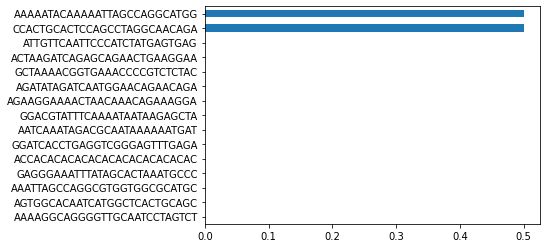

In [12]:
# Get importances
importances = model.named_steps["decisiontreeclassifier"].feature_importances_


# Put importances into a Series
feat_imp = pd.Series(importances,index=X_train.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")


In [25]:
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)
depth_hyperparams = range(1,50,2)

Tree Depth: 2


In [28]:
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model =  make_pipeline(
    StandardScaler(),DecisionTreeClassifier(max_depth=d, random_state=42))
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train, y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_test,y_test))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.6666666666666666, 1.0, 1.0]
Validation Accuracy Scores: [0.6666666666666666, 0.6666666666666666, 0.6666666666666666]


In [30]:
import matplotlib.pyplot as plt

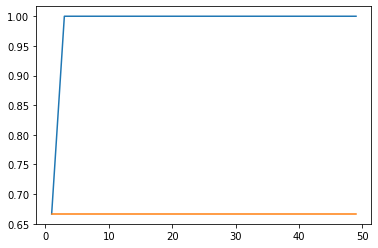

In [31]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams,training_acc,label="training")
plt.plot(depth_hyperparams,validation_acc,label="validation")

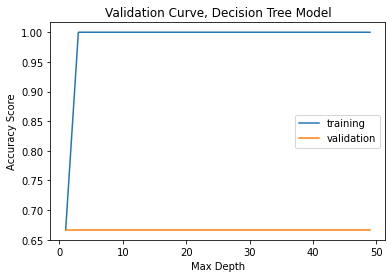

In [32]:
plt.plot(depth_hyperparams,training_acc,label="training")
plt.plot(depth_hyperparams,validation_acc,label="validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.title("Validation Curve, Decision Tree Model")
plt.legend()

In [33]:
# acc_train = accuracy_score(y_train,model.predict(X_train))
# acc_val = model.score(X_val,y_val)
test_acc =  model.score(X_test,y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.67


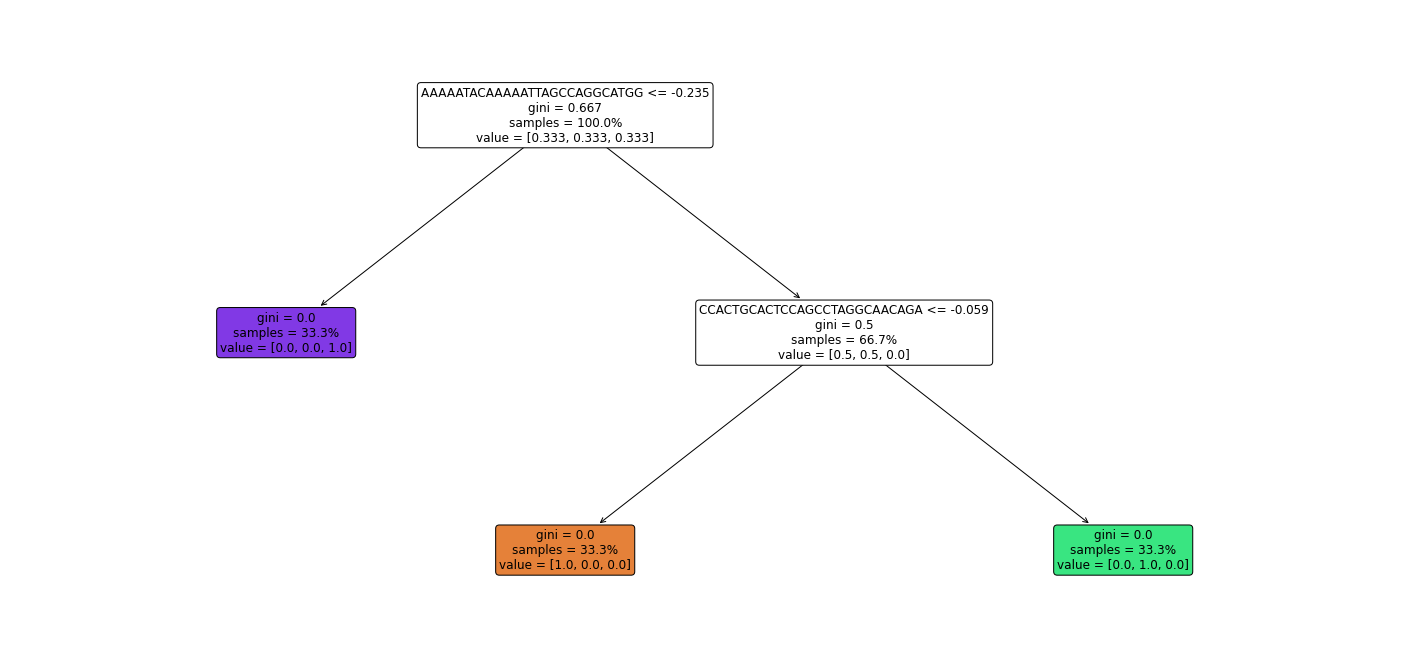

In [34]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree= model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [107]:
# Save your model as `"model-5-2.pkl"`
with open("ANCmodel.pkl","wb") as f:
    pickle.dump(model,f)

In [52]:
import pickle

In [108]:
# Load `"model-5-2.pkl"`
with open("ANCmodel.pkl","rb") as f:
    loaded_model=pickle.load(f)
print(loaded_model)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])


In [117]:
loaded_model.predict(X_test)

array([1, 1, 0])

In [118]:
loaded_model.predict_proba(X_test)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [119]:
y_test

sample_id
HG00235    2
NA19454    1
NA19678    0
Name: Population, dtype: int64

In [120]:
country

{'MXL': 0, 'LWK': 1, 'GBR': 2, 'STU': 3}

In [121]:
y.unique()

array([0, 1, 2])

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix
  

from sklearn.svm import SVC
  
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
  
prediction = svc_model.predict(X_test)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

1.0
0.6666666666666666


In [16]:
svc_model 

SVC(C=0.1, gamma=1, kernel='linear')

In [114]:
prediction.score(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'score'

In [64]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[0 0 0]
 [1 1 0]
 [0 0 1]]


In [65]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)
  
prediction = svc_model.predict(X_test)
  
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.8888888888888888
0.6666666666666666


In [66]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[0 0 0]
 [1 1 0]
 [0 0 1]]


In [19]:
importances = svc_model.coef_

importances
# Put importances into a Series
# feat_imp = pd.Series(importances,index=X_train.columns).sort_values()

# # Plot series
# feat_imp.tail(15).plot(kind="barh")
# plt.xlabel("Gini Importance")
# plt.ylabel("Feature")
# plt.title("Top Ten Feature Importance")
# plt.savefig("feature_importance.png",dpi=100);

array([[ 1.95627844e-05, -1.39244934e-06, -4.56187566e-08, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.26089184e-05, -1.38014076e-06, -7.60546720e-08, ...,
         0.00000000e+00, -8.89917576e-06, -8.89028547e-06],
       [-1.24026775e-04,  3.87745317e-07, -2.91978120e-07, ...,
         0.00000000e+00, -8.05431227e-05, -8.04626601e-05]])

In [67]:
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

SVC()

In [8]:
importance = model.tree_


NameError: name 'model' is not defined

In [70]:
importance